# 必要なライブラリーの読み込み

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.rcParams.update({
    'font.size'      : 14,
    'axes.grid'      : True,
    'grid.linestyle' : '--',
    'figure.figsize' : [12, 6]
})

import statsmodels.datasets.co2 as co2

# statsmodels に用意されているCO2濃度のデータセット

- https://www.statsmodels.org/dev/datasets/generated/co2.html

In [23]:
co2_raw = co2.load().data
co2_raw

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


In [26]:
df = co2_raw.loc['1965-01-01':]
df = df.resample('ME').mean() # 月の最終日で月次データに変換
df.index.name = "YEAR"
df

,co2
YEAR,
1965-01-31,319.400
1965-02-28,320.450
1965-03-31,320.925
1965-04-30,322.000
1965-05-31,322.060
...,...
2001-08-31,369.425
2001-09-30,367.880
2001-10-31,368.050


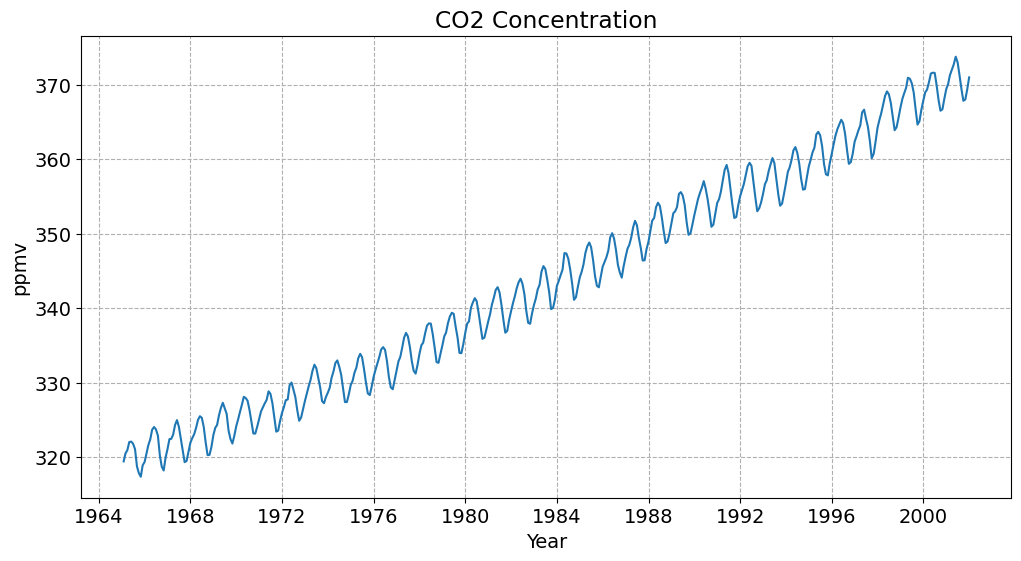

In [22]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(df)

ax.set_title('CO2 Concentration')
ax.set_xlabel('Year')
ax.set_ylabel('ppmv')

plt.savefig('trend_analysis_08/fig-001.png')
plt.show()

In [15]:
model = sm.tsa.UnobservedComponents(
    df,
    level='local linear trend',
    seasonal=12,
)

results = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.80232D+00    |proj g|=  8.88849D-02

At iterate    5    f=  2.31489D+00    |proj g|=  8.31771D-01
  ys=-1.847E+00  -gs= 2.050E-01 BFGS update SKIPPED

At iterate   10    f=  4.99810D-01    |proj g|=  1.27619D+00


 This problem is unconstrained.



At iterate   15    f=  3.45421D-01    |proj g|=  3.76042D-01

At iterate   20    f=  2.46012D-01    |proj g|=  8.57193D-02

At iterate   25    f=  2.45718D-01    |proj g|=  1.68724D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     76      1     1     0   3.247D-03   2.457D-01
  F =  0.24571746957084589     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [27]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Unobserved Components Results                            
=====================================================================================
Dep. Variable:                           co2   No. Observations:                  444
Model:                    local linear trend   Log Likelihood                -109.099
                   + stochastic seasonal(12)   AIC                            226.197
Date:                       Mon, 06 May 2024   BIC                            242.462
Time:                               07:03:23   HQIC                           232.619
Sample:                           01-31-1965                                         
                                - 12-31-2001                                         
Covariance Type:                         opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.0253      0.004      5.804      0.000       0.017       0.034
sigma2.level         0.0434      0.006      7.140      0.000       0.031       0.055
sigma2.trend      9.249e-07    4.1e-06      0.226      0.821    -7.1e-06    8.95e-06
sigma2.seasonal   4.828e-05   7.51e-05      0.643      0.520   -9.89e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.64
Prob(Q):                              0.86   Prob(JB):                         0.72
Heteroskedasticity (H):               1.09   Skew:                            -0.07
Prob(H) (two-sided):                  0.60   Kurtosis:                         3.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/statsmodels/tsa/statespace/structural.py:1738: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(component_bunch['%s_cov' % which])


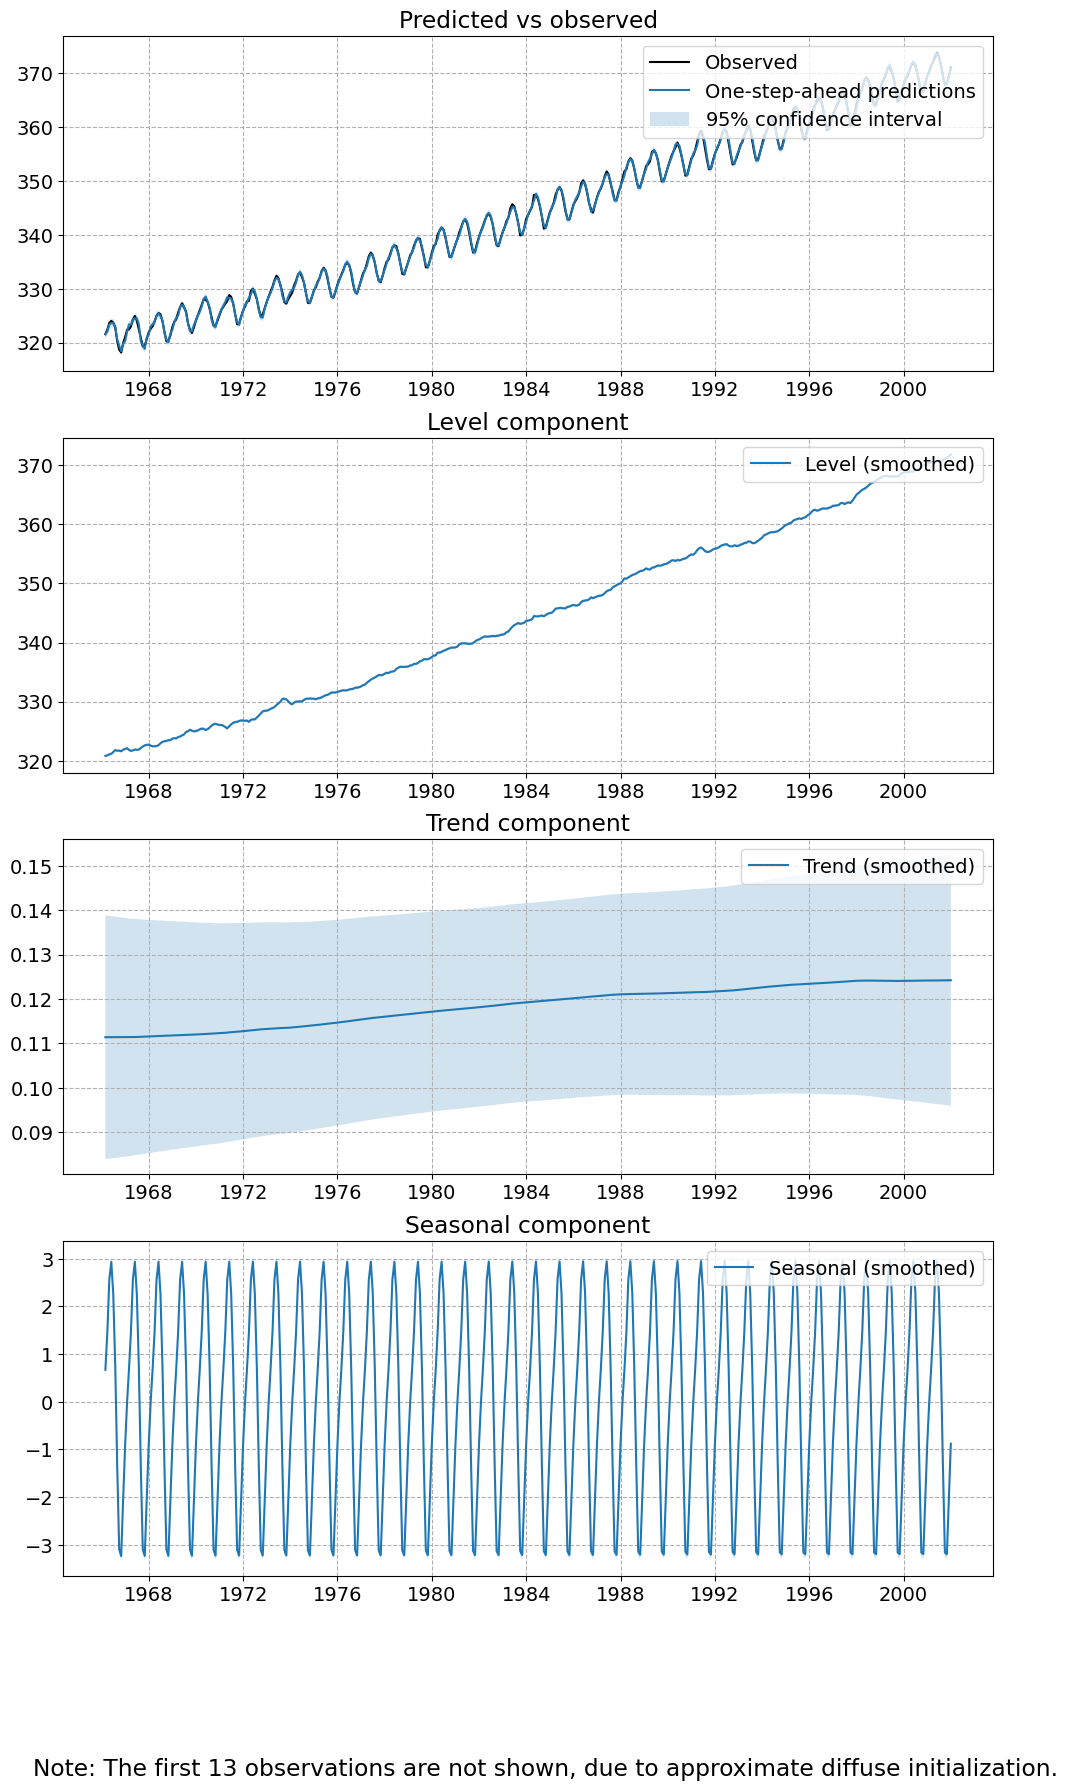

In [21]:
out = results.plot_components(figsize=(12, 20))
plt.savefig('trend_analysis_08/fig-002.png')

In [13]:
# Prediction
prediction = results.predict('2000-01-31', '2005-12-31')

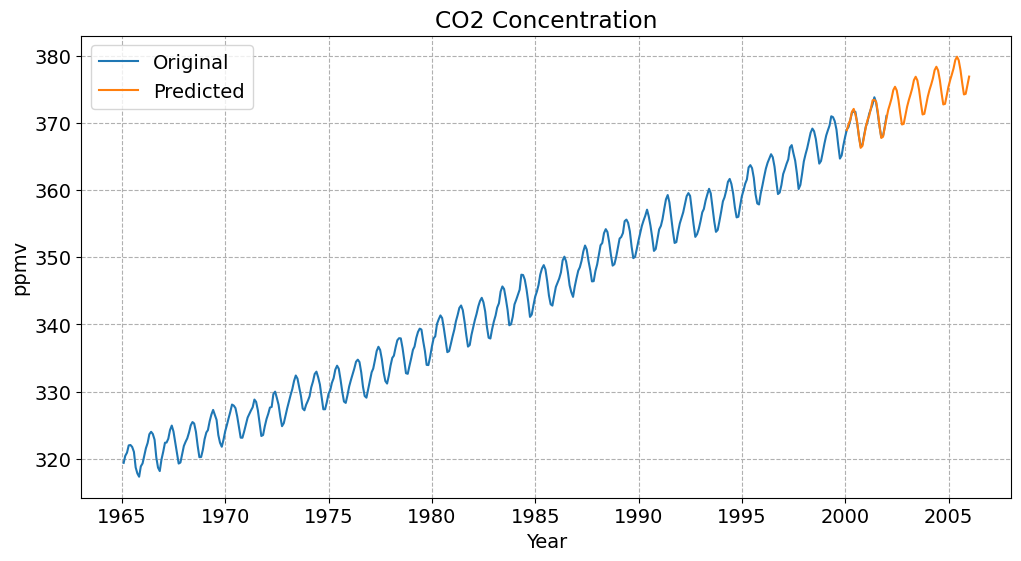

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(df, label='Original', color="C0")
ax.plot(prediction, label='Predicted', color="C1")

ax.set_title('CO2 Concentration')
ax.set_xlabel('Year')
ax.set_ylabel('ppmv')
ax.legend()

plt.savefig('trend_analysis_08/fig-003.png')
plt.show()